# The purpose of this notebook is in running the GridSearch for a CatBoostClassifier. Last set of parameters (with dropping some features) has not been runned, but it had been planned. It's supposed to increase the f1_score.

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline 

In [114]:
from google.colab import files
X_train = pd.read_csv('/X_train.csv')
X_test = pd.read_csv('/X_test.csv')
y_train = pd.read_csv('/y_train.csv')
y_test = pd.read_csv('/y_test.csv')

X_train.drop(labels='Unnamed: 0', axis=1, inplace=True)
X_test.drop(labels='Unnamed: 0', axis=1, inplace=True)
y_train.drop(labels='Unnamed: 0', axis=1, inplace=True)
y_test.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [115]:
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_seq_items', 80)

In [116]:
y_train

,status_group
0,functional
1,non functional
2,functional
3,functional
4,functional
...,...
53276,non functional
53277,non functional
53278,functional
53279,functional needs repair


In [117]:
X_train.shape

(53281, 21)

In [118]:
X_train.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region_code', 'district_code', 'population',
       'public_meeting', 'scheme_management', 'permit', 'extraction_type',
       'management', 'payment_type', 'quality_group', 'quantity',
       'source_type', 'waterpoint_type', 'age'],
      dtype='object')

In [100]:
!pip install catboost

## First run of the CatBoost
### I tried to rerun it, but I reached the gpu limit for today

In [122]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

cat_1 = CatBoostClassifier(iterations=500, learning_rate=0.03, depth=6,
                           l2_leaf_reg=3, loss_function='MultiClass', border_count=32, ctr_target_border_count=50)

idx_cat_feat = [1, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

cat_train = Pool(X_train, y_train, cat_features=idx_cat_feat)
cat_test = Pool(X_test, y_test, cat_features=idx_cat_feat)
cat_1.fit(cat_train)


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 1.0763654	total: 9.12s	remaining: 1h 15m 48s
1:	learn: 1.0565732	total: 15.9s	remaining: 1h 5m 53s
2:	learn: 1.0372780	total: 24.6s	remaining: 1h 8m 1s
3:	learn: 1.0189440	total: 34.1s	remaining: 1h 10m 25s
4:	learn: 1.0016211	total: 43.5s	remaining: 1h 11m 46s
5:	learn: 0.9853425	total: 52.5s	remaining: 1h 12m 3s
6:	learn: 0.9701394	total: 1m 1s	remaining: 1h 12m 33s
7:	learn: 0.9554356	total: 1m 11s	remaining: 1h 13m 33s
8:	learn: 0.9425474	total: 1m 19s	remaining: 1h 12m 5s
9:	learn: 0.9296509	total: 1m 29s	remaining: 1h 13m 15s
10:	learn: 0.9172199	total: 1m 40s	remaining: 1h 14m 12s
11:	learn: 0.9055574	total: 1m 49s	remaining: 1h 14m 31s
12:	learn: 0.8947597	total: 1m 59s	remaining: 1h 14m 52s
13:	learn: 0.8843996	total: 2m 9s	remaining: 1h 15m 11s
14:	learn: 0.8750437	total: 2m 19s	remaining: 1h 15m 3s
15:	learn: 0.8655239	total: 2m 29s	remaining: 1h 15m 9s
16:	learn: 0.8567562	total: 2m 38s	remaining: 1h 15m 13s
17:	learn: 0.8483650	total: 2m 48s	remaining: 1h 15m 18s

In [1]:
y_hat = cat_1.predict(cat_test)
f1_score(y_test, y_hat, average='micro')

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set_style("whitegrid", {'axes.grid' : False})
conf_matr_1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat), display_labels=cat_1.classes_).plot()

## The first GridSearch

In [79]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

idx_cat_feat = [1, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
cat = CatBoostClassifier(iterations=500, cat_features=idx_cat_feat, task_type="GPU", devices='0:1',
                         thread_count=4, loss_function='MultiClass', ctr_target_border_count=50)

hyper_params = {'depth': list(range(6,9)),
                'learning_rate': [0.01, 0.1, 1], 
                'l2_leaf_reg':[1, 3, 5],
                'border_count': [30, 35]}

grid = GridSearchCV(cat, hyper_params, cv=5)

grid.fit(X_train, y_train)
best_param = grid.best_params_
best_param

Streaming output truncated to the last 5000 lines.
0:	learn: 1.0246510	total: 29.8ms	remaining: 14.9s
1:	learn: 0.9661769	total: 58ms	remaining: 14.4s
2:	learn: 0.9186792	total: 85.6ms	remaining: 14.2s
3:	learn: 0.8797930	total: 113ms	remaining: 14s
4:	learn: 0.8471375	total: 139ms	remaining: 13.8s
5:	learn: 0.8194284	total: 167ms	remaining: 13.7s
6:	learn: 0.7961740	total: 194ms	remaining: 13.7s
7:	learn: 0.7764286	total: 221ms	remaining: 13.6s
8:	learn: 0.7587569	total: 264ms	remaining: 14.4s
9:	learn: 0.7435497	total: 291ms	remaining: 14.2s
10:	learn: 0.7301953	total: 317ms	remaining: 14.1s
11:	learn: 0.7181518	total: 344ms	remaining: 14s
12:	learn: 0.7081103	total: 370ms	remaining: 13.8s
13:	learn: 0.6983458	total: 396ms	remaining: 13.8s
14:	learn: 0.6894340	total: 423ms	remaining: 13.7s
15:	learn: 0.6821110	total: 452ms	remaining: 13.7s
16:	learn: 0.6750811	total: 496ms	remaining: 14.1s
17:	learn: 0.6693688	total: 521ms	remaining: 14s
18:	learn: 0.6619959	total: 549ms	remaining: 1

{'border_count': 35, 'depth': 8, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [80]:
best_param = grid.best_params_
best_param

{'border_count': 35, 'depth': 8, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [84]:
cat_opt = CatBoostClassifier(**best_param, iterations=500, cat_features=idx_cat_feat, task_type="GPU", devices='0:1',
                             thread_count=4, loss_function='MultiClass', ctr_target_border_count=50)
cat_opt.fit(X_train, y_train)
f1_score(y_test, cat_opt.predict(X_test), average='micro')

0:	learn: 1.0221073	total: 34.8ms	remaining: 17.4s
1:	learn: 0.9608393	total: 73.7ms	remaining: 18.3s
2:	learn: 0.9123140	total: 111ms	remaining: 18.3s
3:	learn: 0.8729051	total: 149ms	remaining: 18.4s
4:	learn: 0.8400925	total: 184ms	remaining: 18.2s
5:	learn: 0.8121784	total: 221ms	remaining: 18.2s
6:	learn: 0.7881171	total: 264ms	remaining: 18.6s
7:	learn: 0.7674244	total: 301ms	remaining: 18.5s
8:	learn: 0.7489365	total: 338ms	remaining: 18.5s
9:	learn: 0.7332682	total: 375ms	remaining: 18.4s
10:	learn: 0.7204958	total: 410ms	remaining: 18.2s
11:	learn: 0.7086870	total: 445ms	remaining: 18.1s
12:	learn: 0.6987671	total: 485ms	remaining: 18.2s
13:	learn: 0.6900221	total: 520ms	remaining: 18s
14:	learn: 0.6806521	total: 555ms	remaining: 17.9s
15:	learn: 0.6731037	total: 590ms	remaining: 17.8s
16:	learn: 0.6666571	total: 635ms	remaining: 18s
17:	learn: 0.6591447	total: 669ms	remaining: 17.9s
18:	learn: 0.6523702	total: 706ms	remaining: 17.9s
19:	learn: 0.6458730	total: 749ms	remaining

0.7976693126161122

## The second GridSearch

In [85]:
hyper_params_2 = {'depth': list(range(6,9)),
                'learning_rate': [0.05, 0.10, 0.15], 
                'l2_leaf_reg':[0.1, 1, 1.5],
                'border_count': [34, 36]}

grid_2 = GridSearchCV(cat, hyper_params_2, cv=5)

grid_2.fit(X_train, y_train)

0:	learn: 1.0605561	total: 21.6ms	remaining: 10.8s
1:	learn: 1.0269456	total: 42.9ms	remaining: 10.7s
2:	learn: 0.9971231	total: 61.8ms	remaining: 10.2s
3:	learn: 0.9706195	total: 80.5ms	remaining: 9.98s
4:	learn: 0.9468255	total: 99.5ms	remaining: 9.85s
5:	learn: 0.9254857	total: 118ms	remaining: 9.71s
6:	learn: 0.9058388	total: 136ms	remaining: 9.59s
7:	learn: 0.8878363	total: 161ms	remaining: 9.89s
8:	learn: 0.8715260	total: 180ms	remaining: 9.79s
9:	learn: 0.8564950	total: 197ms	remaining: 9.67s
10:	learn: 0.8427599	total: 215ms	remaining: 9.57s
11:	learn: 0.8299967	total: 252ms	remaining: 10.3s
12:	learn: 0.8185198	total: 271ms	remaining: 10.2s
13:	learn: 0.8076801	total: 290ms	remaining: 10.1s
14:	learn: 0.7975885	total: 309ms	remaining: 9.98s
15:	learn: 0.7880437	total: 327ms	remaining: 9.9s
16:	learn: 0.7793468	total: 352ms	remaining: 9.99s
17:	learn: 0.7713920	total: 371ms	remaining: 9.92s
18:	learn: 0.7638060	total: 390ms	remaining: 9.87s
19:	learn: 0.7566407	total: 409ms	rem

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
SystemError: <method '_train' of '_catboost._CatBoost' objects> returned a result with an error set

  FitFailedWarning)
Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 1.0614728	total: 18.2ms	remaining: 9.06s
1:	learn: 1.0274697	total: 35.5ms	remaining: 8.84s
2:	learn: 0.9977074	total: 54.8ms	remaining: 9.07s
3:	learn: 0.9706923	total: 70.6ms	remaining: 8.76s
4:	learn: 0.9461950	total: 87.1ms	remaining: 8.62s
5:	learn: 0.9240190	total: 104ms	remaining: 8.54s
6:	learn: 0.9042473	total: 119ms	remaining: 8.41s
7:	learn: 0.8859293	total: 149ms	remaining: 9.17s
8:	learn: 0.8695972	total: 165ms	remaining: 9.02s
9:	learn: 0.8542746	total: 188ms	remaining: 9.19s
10:	learn: 0.8404586	total: 204ms	remaining: 9.07s
11:	learn: 0.8278133	total: 229ms	remaining: 9.31s
12:	learn: 0.8161245	total: 245ms	remaining: 9.18s
13:	learn: 0.8053050	total: 261ms	remaining: 9.07s
14:	learn: 0.7953801	total: 277ms	remaining: 8.96s
15:	learn: 0.7860038	total: 293ms	remaining: 8.87s
16:	learn: 0.7772125	total: 310ms	remaining: 8.8s
17:	learn: 0.7689650	total: 326ms	remaining: 8.73s
18:	learn: 0.7613478	total: 342ms	remaining: 8.66s
19:	learn: 0.7544715	total: 358ms	rem

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Streaming output truncated to the last 5000 lines.
0:	learn: 1.0216991	total: 31.1ms	remaining: 15.5s
1:	learn: 0.9612867	total: 59.7ms	remaining: 14.9s
2:	learn: 0.9126349	total: 87.9ms	remaining: 14.6s
3:	learn: 0.8731047	total: 115ms	remaining: 14.3s
4:	learn: 0.8402905	total: 142ms	remaining: 14s
5:	learn: 0.8121246	total: 169ms	remaining: 13.9s
6:	learn: 0.7881607	total: 197ms	remaining: 13.9s
7:	learn: 0.7686851	total: 225ms	remaining: 13.8s
8:	learn: 0.7509082	total: 267ms	remaining: 14.5s
9:	learn: 0.7355905	total: 293ms	remaining: 14.4s
10:	learn: 0.7222206	total: 320ms	remaining: 14.2s
11:	learn: 0.7099588	total: 357ms	remaining: 14.5s
12:	learn: 0.7001368	total: 384ms	remaining: 14.4s
13:	learn: 0.6901001	total: 412ms	remaining: 14.3s
14:	learn: 0.6813263	total: 440ms	remaining: 14.2s
15:	learn: 0.6740044	total: 483ms	remaining: 14.6s
16:	learn: 0.6666985	total: 512ms	remaining: 14.5s
17:	learn: 0.6611412	total: 539ms	remaining: 14.4s
18:	learn: 0.6538479	total: 567ms	remain

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f6cd7275690>,
             iid='deprecated', n_jobs=None,
             param_grid={'border_count': [34, 36], 'depth': [6, 7, 8],
                         'l2_leaf_reg': [0.1, 1, 1.5],
                         'learning_rate': [0.05, 0.1, 0.15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [86]:
best_param_2 = grid_2.best_params_
cat_opt_2 = CatBoostClassifier(**best_param_2, iterations=500, cat_features=idx_cat_feat, task_type="GPU", devices='0:1',
                               thread_count=4, loss_function='MultiClass', ctr_target_border_count=50)
cat_opt_2.fit(X_train, y_train)

0:	learn: 0.9861601	total: 36ms	remaining: 17.9s
1:	learn: 0.9063191	total: 77ms	remaining: 19.2s
2:	learn: 0.8487788	total: 113ms	remaining: 18.6s
3:	learn: 0.8053607	total: 148ms	remaining: 18.4s
4:	learn: 0.7718368	total: 183ms	remaining: 18.1s
5:	learn: 0.7445519	total: 218ms	remaining: 17.9s
6:	learn: 0.7233527	total: 262ms	remaining: 18.4s
7:	learn: 0.7053125	total: 296ms	remaining: 18.2s
8:	learn: 0.6898303	total: 338ms	remaining: 18.4s
9:	learn: 0.6772898	total: 373ms	remaining: 18.3s
10:	learn: 0.6671000	total: 407ms	remaining: 18.1s
11:	learn: 0.6561831	total: 440ms	remaining: 17.9s
12:	learn: 0.6469679	total: 475ms	remaining: 17.8s
13:	learn: 0.6377521	total: 509ms	remaining: 17.7s
14:	learn: 0.6285823	total: 545ms	remaining: 17.6s
15:	learn: 0.6228763	total: 582ms	remaining: 17.6s
16:	learn: 0.6163019	total: 618ms	remaining: 17.6s
17:	learn: 0.6102886	total: 652ms	remaining: 17.5s
18:	learn: 0.6039943	total: 690ms	remaining: 17.5s
19:	learn: 0.5990094	total: 730ms	remaining

In [88]:
print(best_param_2)
f1_score(y_test, cat_opt_2.predict(X_test), average='micro')

{'border_count': 36, 'depth': 8, 'l2_leaf_reg': 0.1, 'learning_rate': 0.15}


0.8057760513426787

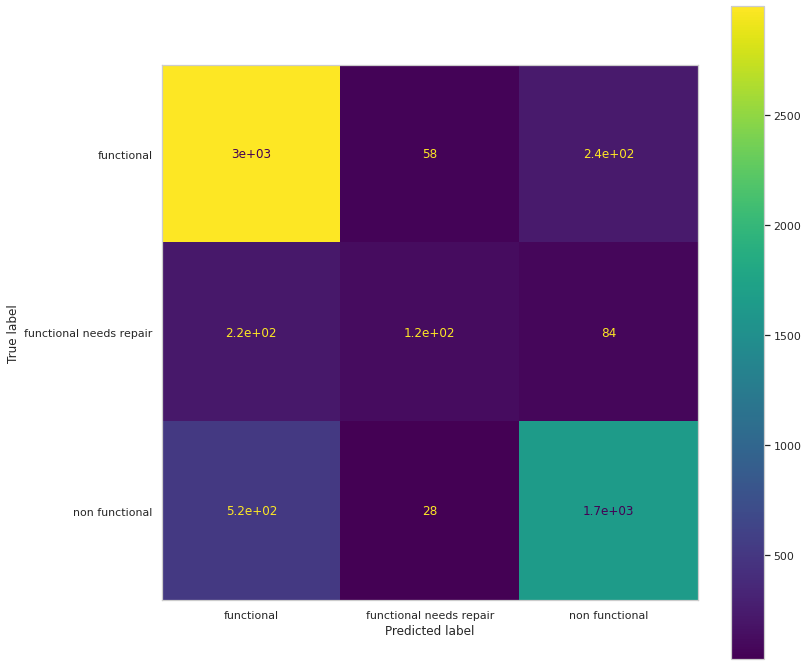

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set(rc={'figure.figsize': (12,12)})
sns.set_style("whitegrid", {'axes.grid' : False})
conf_matr_2 = ConfusionMatrixDisplay(confusion_matrix(y_test, cat_opt_2.predict(X_test)), display_labels=cat_opt_2.classes_).plot()

## The third GridSearch. Had not been runned yet (but it will be)

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

X_train.drop(labels=['district_code', 'installer', 'scheme_management', 'source_type'], axis=1, inplace=True)
X_test.drop(labels=['district_code', 'installer', 'scheme_management', 'source_type'], axis=1, inplace=True)

idx_cat_feat = [1, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
cat = CatBoostClassifier(iterations=500, cat_features=idx_cat_feat, task_type="GPU", devices='0:1',
                         thread_count=4, loss_function='MultiClass', ctr_target_border_count=50)

hyper_params_3 = {'depth': list(range(6,9)),
                'learning_rate': [0.08, 0.12, 0.16], 
                'l2_leaf_reg':[0.01, 0.05, 0.1],
                'border_count': [36, 38, 40]}

grid_3 = GridSearchCV(cat, hyper_params_3, cv=5)

grid_3.fit(X_train, y_train)

In [ ]:
best_param_3 = grid_3.best_params_
cat_opt_3 = CatBoostClassifier(**best_param_3, iterations=500, cat_features=idx_cat_feat, task_type="GPU", devices='0:1',
                               thread_count=4, loss_function='MultiClass', ctr_target_border_count=50)
cat_opt_3.fit(X_train, y_train)

In [ ]:
print(best_param_3)
f1_score(y_test, cat_opt_3.predict(X_test), average='micro')